# Impact of COVID-19 in Mexico City during January 2022 
### COVID-19 Cases, Hspitalized People and Hospitals Capcity 
#### Carlos Eduardo Peña Muñoz - A00826254

In [1]:
#pip install xlrd

In [2]:
#pip install openpyxl

In [3]:
#pip install pandas

In [4]:
#pip install numpy

In [5]:
#pip install matplotlib

In [6]:
#pip install seaborn

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
%ls presentacion 

capacidadhospitalaria.csv  casospositivos.csv  personashospitalizadas.csv


### Data Base of Positive Cases of COVID-19

In [9]:
df = pd.read_csv('presentacion/casospositivos.csv')
df.head()

,fecha_toma_muestra,pruebas_totales,positivos_totales,pruebas_totales_cdmx,positivos_totales_cdmx,tasa_positividad,tasa_positividad_cdmx
0,2020-03-05,69,1,52,1,0.014493,0.019231
1,2020-03-13,57,2,46,1,0.035088,0.021739
2,2020-03-19,67,3,67,3,0.044776,0.044776
3,2020-03-24,66,1,60,1,0.015152,0.016667
4,2020-03-26,54,1,50,1,0.018519,0.020000


### What was the daily rate of positive cases of COVID-19 in Mexico City during January 2022?

#### First we have to clean up the data...

In [10]:
df.drop(['pruebas_totales','tasa_positividad','pruebas_totales','positivos_totales'],
        axis = 1,
        inplace = True)
df.columns

Index(['fecha_toma_muestra', 'pruebas_totales_cdmx', 'positivos_totales_cdmx',
       'tasa_positividad_cdmx'],
      dtype='object')

In [11]:
df.rename(columns = {'pruebas_totales_cdmx' : 'Number of Tests',
                     'positivos_totales_cdmx' : 'Number of Positive Cases',
                     'fecha_toma_muestra' : 'Date',
                     'tasa_positividad_cdmx' : 'Positivity Rate',},
          inplace = True
         )

In [12]:
dt = df[(df['Date'] > '2022-01-01') & (df['Date'] < '2022-01-31')]

In [13]:
dt.head()

,Date,Number of Tests,Number of Positive Cases,Positivity Rate
651,2022-01-02,1776,515,0.289977
652,2022-01-03,12115,4132,0.341065
653,2022-01-04,14725,5228,0.355042
654,2022-01-05,16678,6486,0.388896
655,2022-01-06,18337,7088,0.386541


### Description of Variables
##### Date: The exact date registered.
##### Number of Test: Number of tests taken each day.
##### Number of Positive Cases: Number of positive cases each day.
##### Positivity Rate: Daily rate of positive cases vs number of tests each day.

In [14]:
myPivot = pd.pivot_table(dt,
                         index = 'Date',
                         values = 'Positivity Rate',
                        )
myPivot

,Positivity Rate
Date,
2022-01-02,0.289977
2022-01-03,0.341065
2022-01-04,0.355042
2022-01-05,0.388896
2022-01-06,0.386541
2022-01-07,0.390514
2022-01-08,0.352720
2022-01-09,0.352813
2022-01-10,0.405580


### Description
##### Here we can visualize the daily positivity rate of every COVID-19 test registered during January 2022.

### How does the regression plot look like comparing: "Number of Tests" & "Number of Positive Cases" during January 2022?

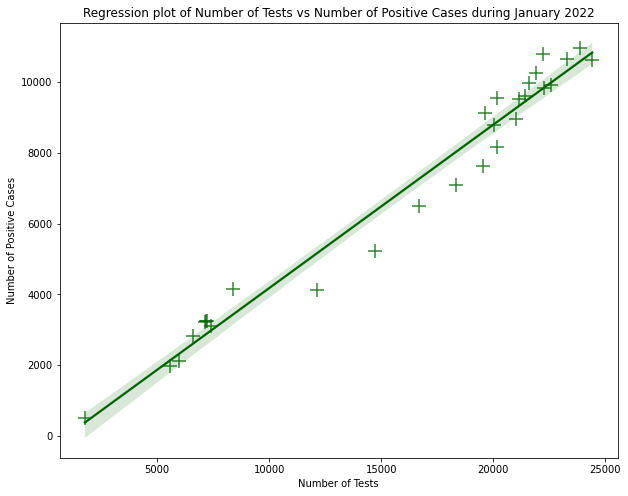

In [15]:
plt.figure(figsize = (10,8))
ax = sns.regplot(x = 'Number of Tests',
                 y = 'Number of Positive Cases',
                 data = dt,
                 color = 'darkgreen',
                 marker = '+',
                 scatter_kws = {'s':200}
                )

ax.set(xlabel = 'Number of Tests',
      ylabel = 'Number of Positive Cases')


ax.set_title('Regression plot of Number of Tests vs Number of Positive Cases during January 2022')
plt.show()

### Description
##### This graph allows us to visualize the increment of COVID-19 positive cases during January 2022 in Mexico City.

### Data Base of Hospitalized People because of COVID-19

In [16]:
de = pd.read_csv('presentacion/personashospitalizadas.csv')
de.head()

,fecha,año,mes,dia,hospitalizados_totales,hospitalizados_totales_cdmx,hospitalizados_totales_edomex,camas_intubados_totales,camas_intubados_cdmx,camas_intubados_edomex
0,2020-03-24,2020,marzo,24,50,50,0,39,39,0
1,2020-03-25,2020,marzo,25,105,105,0,33,33,0
2,2020-03-26,2020,marzo,26,128,128,0,42,42,0
3,2020-03-27,2020,marzo,27,175,175,0,60,60,0
4,2020-03-28,2020,marzo,28,257,257,0,78,78,0


### First we have to clean up the data...

In [17]:
de.drop(['año','mes','dia','hospitalizados_totales','hospitalizados_totales_edomex','camas_intubados_totales','camas_intubados_edomex'],
        axis = 1,
        inplace = True)
de.columns

Index(['fecha', 'hospitalizados_totales_cdmx', 'camas_intubados_cdmx'], dtype='object')

In [18]:
de.rename(columns = {'fecha' : 'Date',
                     'hospitalizados_totales_cdmx' : 'Number of Hospitalized Cases',
                     'camas_intubados_cdmx' : 'Number of Intubated cases'},
          inplace = True
         )

In [20]:
do = de[(de['Date'] > '2022-01-01') & (de['Date'] < '2022-01-31')]
do.head()

,Date,Number of Hospitalized Cases,Number of Intubated cases
634,2022-01-02,241,90
635,2022-01-03,293,103
636,2022-01-04,321,99
637,2022-01-05,360,99
638,2022-01-06,409,103
